## Generating the coefficients for the IIR filter in CPP implementation

*************************SOS coefficients before scaling*************************
[[ 0.39662391  0.79324782  0.39662391  1.          0.52257401  0.24180425]
 [ 1.         -2.          1.          1.         -1.80052287  0.82022663]]
*********************************************************************************
*************************SOS coefficients after scaling*************************
[[  6498.  12997.   6498.  16384.   8562.   3962.]
 [ 16384. -32768.  16384.  16384. -29500.  13439.]]
*********************************************************************************
*************************SOS coefficients to paste in CPP*************************
6498,12997,6498,16384,8562,3962,14
16384,-32768,16384,16384,-29500,13439,14
*********************************************************************************


C:\Users\ankur\AppData\Local\Temp\ipykernel_18404\1621503366.py:42: RuntimeWarning: divide by zero encountered in log
  pl.plot(w/np.pi/2*fs,20*np.log(np.abs(h)))


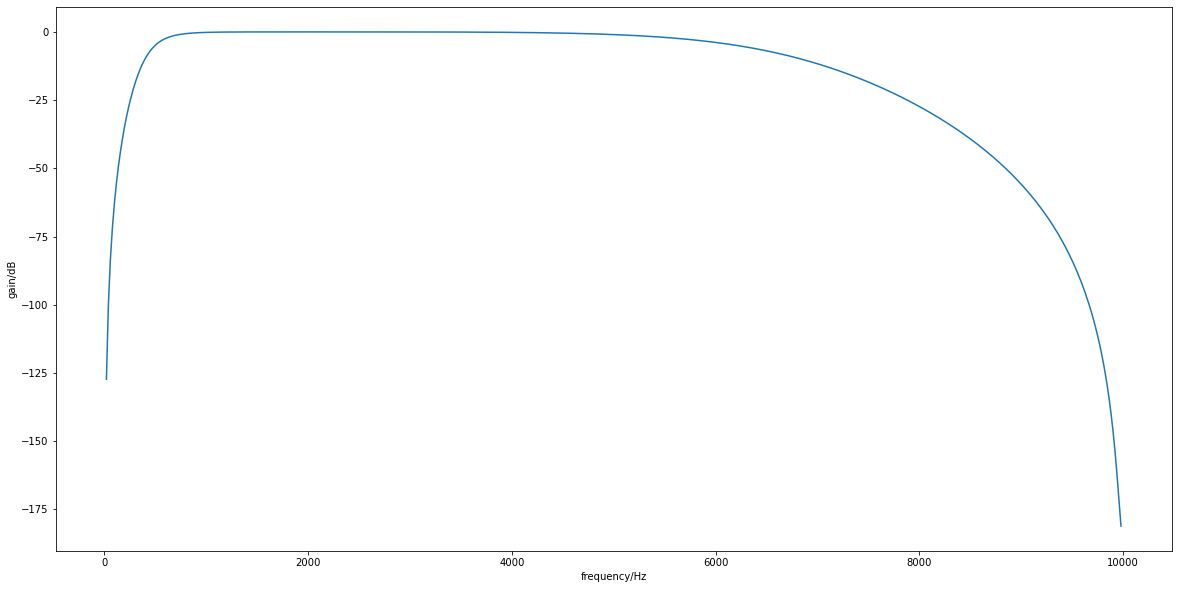

In [7]:
import numpy as np
import scipy.signal as signal
import pylab as pl

# sampling rate from README.md
fs = 20000

# cutoffs decided from dataInspection.ipynb
f1 = 450
f2 = 6500

# scaling factor in bits
q = 14
# scaling factor itself
scaling_factor = 2**q

## the above is necessary for fixed point filter.

# generating the sequence of coefficients
sos = signal.butter(2,[f1/fs*2,f2/fs*2],'band',output='sos')
print("*************************SOS coefficients before scaling*************************")
print(sos)
print("*********************************************************************************")

sos = np.round(sos * scaling_factor)
print("*************************SOS coefficients after scaling*************************")
print(sos)
print("*********************************************************************************")

# print coefficients for pasting in CPP
print("*************************SOS coefficients to paste in CPP*************************")
for biquad in sos:
    for coeff in biquad:
        print(int(coeff),",",sep="",end="")
    print(q)
print("*********************************************************************************")

## plot the frequency response
pl.rcParams["figure.figsize"] = [20,10]
b,a = signal.sos2tf(sos)
w,h = signal.freqz(b,a)
pl.plot(w/np.pi/2*fs,20*np.log(np.abs(h)))
pl.xlabel('frequency/Hz');
pl.ylabel('gain/dB');
pl.show()
